In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("Data/fake reviews dataset.csv")

In [12]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [9]:
df.shape

(40432, 4)

In [7]:
df['category'].unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

In [14]:
df['label'].unique()

array(['CG', 'OR'], dtype=object)

In [15]:
# Remove any duplicate rows, then check for NA values for each column
df = df.drop_duplicates(subset='text_')
print(df.isnull().sum())

category    0
rating      0
label       0
text_       0
dtype: int64


In [16]:
# Rename columns so that they are more descriptive
colnames_dict = {"label": "type", "text_": "comments"}
df.rename(columns=colnames_dict, inplace=True)

df.head()

,category,rating,type,comments
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [17]:
# Count values in Type column
df['type'].value_counts()

OR    20215
CG    20197
Name: type, dtype: int64

In [20]:
# Map the type column to numeric values:
  # CG (Computer-generated fake reviews) = 0
  # OR (Original reviews, presumably human-created and authentic) = 1

label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

In [21]:
df_dummies = pd.get_dummies(df['category'])

df = pd.concat([df, df_dummies], axis=1)
print(df.columns)

Index(['category', 'rating', 'type', 'comments', 'Books_5',
       'Clothing_Shoes_and_Jewelry_5', 'Electronics_5', 'Home_and_Kitchen_5',
       'Kindle_Store_5', 'Movies_and_TV_5', 'Pet_Supplies_5',
       'Sports_and_Outdoors_5', 'Tools_and_Home_Improvement_5',
       'Toys_and_Games_5', 'Books_5', 'Clothing_Shoes_and_Jewelry_5',
       'Electronics_5', 'Home_and_Kitchen_5', 'Kindle_Store_5',
       'Movies_and_TV_5', 'Pet_Supplies_5', 'Sports_and_Outdoors_5',
       'Tools_and_Home_Improvement_5', 'Toys_and_Games_5'],
      dtype='object')


In [81]:
# OPT 1
# Get TF-IDF features from 'comments' column

vectorizer = TfidfVectorizer()
x_vect = vectorizer.fit_transform(df['comments'])
vectorizer.get_feature_names_out()


array(['00', '000', '0005', ..., 'zurg', 'zyliss', 'zymox'], dtype=object)

In [89]:
# OPT 2
## relev params: analyzer, stop_words, ngram_range => responsible for size of matrix

vectorizer2 = TfidfVectorizer(stop_words='english')
x_vect2 = vectorizer2.fit_transform(df['comments'])
vectorizer2.get_feature_names_out()

array(['00', '000', '0005', ..., 'zurg', 'zyliss', 'zymox'], dtype=object)

In [24]:
target_var  = 'type'
feature_var = ['category', 'rating', 'comments'] 

X = df[feature_var]
Y = df[target_var]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=101)


In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(28288, 3)
(12124, 3)
(28288,)
(12124,)


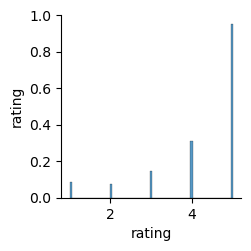

In [27]:
feature_var = ['category', 'rating']
sns.pairplot(df[feature_var])